#### In this version, the description only consider the 'description.descripiton' variable.

In [1]:
#!pip install nltk
#import nltk
#nltk.download('averaged_perceptron_tagger')
#!pip install wordcloud
#!pip install pyLDAvis

# Data Cleaning

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Step 0: read file and explore the data

In [3]:
airbnb0 = pd.read_csv(r'data/ListingDetails_GLA_2021.csv')
airbnb0.head(3)

,listing_id,timestamp,lat,lng,city,localised_city,state,number_of_listed_rooms,number_of_photos,is_hotel,...,description.description,description.access,description.interaction,description.transit,description.locale,description.house_rules,description.neighborhood_overview,description.name,description.localized_language_name,description.author_type
0,6463,2021-10-23T00:43:15.15258Z,55.87671,-4.31250,Glasgow,NaN,NaN,1,22,False,...,Bright comfortable room in traditional 19th ce...,"We provide towels, bathrobes and a hairdryer. ...",NaN,The apartment is 8 minutes walk from Hyndland ...,en-GB,We can usually be flexible but please discuss ...,"Glasgow is home to great shops, culture, music...",West End Sky View (SEC for COP26),NaN,human
1,51514,2021-03-12T04:48:36.419362Z,55.85933,-4.24981,Glasgow,NaN,Scotland,2,19,False,...,The apartment is located in a historic period ...,Guests have the full use of the apartment whic...,Guests can contact me easily if there is any p...,The apartment is so central that a car is not ...,en,NaN,As well as being a fabulous comfortable apartm...,The Library Apartment - centrally situated.,English,human
2,85388,2021-12-17T05:54:33.839599Z,55.88541,-4.23619,Glasgow,NaN,Scotland,0,13,False,...,Hi! This is a hostel style accommodation with ...,"The hostel style room that is shared, bathroom...","I live on the property, so I'll stay in commun...","Buses number 87, 88, 89 take you to the City C...",en,"No parties or smoking, no shoes inside, talk q...","This is a quiet neighbourhood, close to City C...",Scotland / Glasgow Accommodation,English,human


In [4]:
airbnb0.tail(3)

,listing_id,timestamp,lat,lng,city,localised_city,state,number_of_listed_rooms,number_of_photos,is_hotel,...,description.description,description.access,description.interaction,description.transit,description.locale,description.house_rules,description.neighborhood_overview,description.name,description.localized_language_name,description.author_type
7908,53962623,2021-12-31T16:02:42.61561Z,55.87833,-4.28904,Glasgow City,NaN,Scotland,1,16,False,...,"A lovingly Victorian town house, complete with...",NaN,NaN,NaN,en,Latest check in is at 19:30,We are beside Botanic Gardens at Byres Road in...,Triple Ensuite at The Georgian House Hotel,English,human
7909,53962627,2021-12-31T16:03:18.008776Z,55.87712,-4.28991,Glasgow City,NaN,Scotland,0,16,False,...,"A lovingly Victorian town house, complete with...",NaN,NaN,NaN,en,Latest check in is at 19:30,We are beside Botanic Gardens at Byres Road in...,Apartment Studio Ensuite at The Georgian House...,English,human
7910,53962629,2021-12-31T16:01:48.569491Z,55.87650,-4.28899,Glasgow City,NaN,Scotland,1,12,False,...,"A lovingly Victorian town house, complete with...",NaN,NaN,NaN,en,Latest check in is at 19:30,We are beside Botanic Gardens at Byres Road in...,Family Ensuite at The Georgian House Hotel,English,human


In [5]:
print(airbnb0.shape)
print(airbnb0.columns)
print(airbnb0['description.author_type'].unique())

(7911, 35)
Index(['listing_id', 'timestamp', 'lat', 'lng', 'city', 'localised_city',
       'state', 'number_of_listed_rooms', 'number_of_photos', 'is_hotel',
       'bed_label', 'bedroom_label', 'bathroom_label', 'max_nights',
       'min_nights', 'guest_label', 'star_rating', 'room_type_category',
       'property_type_in_city', 'is_hosted_by_superhost',
       'room_and_property_type', 'has_commercial_host_info',
       'description.space', 'description.notes', 'description.summary',
       'description.description', 'description.access',
       'description.interaction', 'description.transit', 'description.locale',
       'description.house_rules', 'description.neighborhood_overview',
       'description.name', 'description.localized_language_name',
       'description.author_type'],
      dtype='object')
['human']


In [6]:
#select variables and change variable 'timestamp' to only contain date

airbnb0 = pd.DataFrame(airbnb0, columns = ['listing_id', 'timestamp', 'lat', 'lng',
                                          'number_of_listed_rooms', 'is_hotel','bed_label', 'bedroom_label',
                                          'guest_label', 'star_rating', 'room_type_category','property_type_in_city',
                                          'room_and_property_type','description.description',
                                          'description.localized_language_name'])
airbnb0.head()
print(airbnb0.shape)
airbnb0['timestamp'] = airbnb0['timestamp'].str.split('T',expand = True)[0]
# Convert the date to datetime64
airbnb0['timestamp'] = pd.to_datetime(airbnb0['timestamp'], format='%Y-%m-%d')

airbnb0.head()
print(airbnb0.shape)

(7911, 15)
(7911, 15)


Step 1: Delete data other than Jan 2021 to Dec 2021

In [7]:
# Filter data between two dates
airbnb1 = airbnb0.loc[(airbnb0['timestamp'] >= '2021-1-1')
                     & (airbnb0['timestamp'] <= '2021-12-31')]
print(len(airbnb1))

7911


Step 2: Delete data outside Glasgow

EPSG:27700
EPSG:27700
(6760, 37)
(1151, 16)


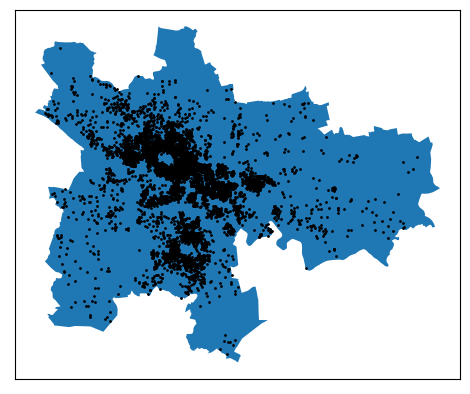

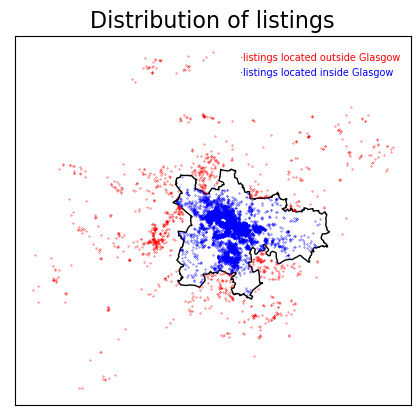

In [8]:
boundary = gpd.read_file(r'data/GlasgowBdry_2011/GlasgowBdry_2011.shp')
boundary.head()
print(boundary.crs)

airbnb1_g = gpd.GeoDataFrame(airbnb1,geometry = gpd.points_from_xy(airbnb1.lng,airbnb1.lat),crs = 'EPSG:4326')
airbnb1_g.head()
airbnb1_g = airbnb1_g.to_crs(27700)
print(airbnb1_g.crs)
airbnb2_g = gpd.sjoin(airbnb1_g,boundary,how = "inner")

#plot for check
ax = airbnb2_g.plot(color = 'black', zorder=2,markersize = 1)
boundary.plot(ax = ax, zorder = 1)
plt.xticks([])
plt.yticks([])
print(airbnb2_g.shape)

airbnb2_d = airbnb1_g.drop(airbnb2_g.index)
print(airbnb2_d .shape)

#plot 
plt.plot(figsize=(20,16))
ax = airbnb2_g.plot(color = 'b', zorder=3, marker=".", markersize=.3)
ax1 = airbnb2_d.plot(ax = ax, color = 'r', zorder = 2, marker=".", markersize=.3)
boundary.plot(ax = ax1, color='w', edgecolor='k', zorder = 1)
ax.annotate("·listings located inside Glasgow", xy=(259000,685000),color='b',fontsize=7)
ax.annotate("·listings located outside Glasgow", xy=(259000,687000),color='r',fontsize=7)
plt.title('Distribution of listings', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.grid(True, alpha=0.5)
plt.savefig('data cleaning figure.png',dpi=300)

Step 3: Delete duplicate data by id

In [9]:
#checking for any duplicate data by id
print(len(airbnb2_g[airbnb2_g['listing_id'].duplicated()])) #--no duplicate data
airbnb3_g = airbnb2_g
print(airbnb3_g.shape)

0
(6760, 37)


Step 4: Delete data whose end date is earlier than the start date

- As there is only one time variable in this dataset, this step is skipped in the data cleaning.

Step 5: Delete null and non-English description data

In [10]:
#delete null description data    
airbnb5_g = airbnb3_g[~(airbnb3_g['description.description'].isna())]
print(airbnb5_g.shape)
print("\n")

#delete non-English description data
print(airbnb5_g['description.localized_language_name'].value_counts().sort_index())
print("\n")
airbnb5_g = airbnb5_g[airbnb5_g['description.localized_language_name'] == 'English']
print(airbnb5_g.shape)

(6631, 37)


Arabic                     1
Chinese (Simplified)       3
Danish                     1
English                 6583
French                     5
German                     1
Hungarian                  3
Italian                    7
Lithuanian                 1
Polish                     3
Portuguese                 2
Russian                    1
Spanish                    9
Turkish                    5
Name: description.localized_language_name, dtype: int64


(6583, 37)


Step 6: Delete data whose description is less than 2 percentile words long and more than 98 percentile words long.

In [11]:
airbnb6_g = airbnb5_g.reset_index(drop=True)
airbnb6_g['description.description'].replace({'\n': ' '}, regex=True, inplace=True)
airbnb6_g['description.description'].replace({'min ': 'minute '}, regex=True, inplace=True) #for replacing again

airbnb6_g['word_count'] = airbnb6_g['description.description'].apply(lambda n: len(n.split()))
airbnb6_g.head(3) #for checking


,listing_id,timestamp,lat,lng,number_of_listed_rooms,is_hotel,bed_label,bedroom_label,guest_label,star_rating,...,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,Council,FILE_NAM_1,Pop,Density,response,word_count
0,51514,2021-03-12,55.85933,-4.24981,2,False,2 beds,1 bedroom,4 guests,5.0,...,AA,CIVIL ADMINISTRATION AREA,NaN,NaN,Glasgow City,GLASGOW_CITY,593000.0,3394.865101,89.0,497
1,85388,2021-12-17,55.88541,-4.23619,0,False,8 beds,1 bedroom,8 guests,4.5,...,AA,CIVIL ADMINISTRATION AREA,NaN,NaN,Glasgow City,GLASGOW_CITY,593000.0,3394.865101,89.0,921
2,95969,2021-12-17,55.84032,-4.20632,1,False,2 beds,1 bedroom,3 guests,5.0,...,AA,CIVIL ADMINISTRATION AREA,NaN,NaN,Glasgow City,GLASGOW_CITY,593000.0,3394.865101,89.0,315


In [12]:
a = airbnb6_g['word_count'].quantile(1-0.02)
b = airbnb6_g['word_count'].quantile(0.02)
airbnb6_g = airbnb6_g[((airbnb6_g['word_count']<=a)&(airbnb6_g['word_count']>=b))]
print(airbnb6_g.shape)

(6332, 38)


Step 7: Delete the specific property types

In [13]:
print(airbnb6_g['room_type_category'].unique())
airbnb7_g = airbnb6_g[airbnb6_g['room_type_category'] == 'entire_home']
print(airbnb7_g['room_and_property_type'].unique())
print(airbnb7_g.shape)
print(airbnb7_g[airbnb7_g['room_and_property_type'].isin(['Entire guest suite','Entire guesthouse','Castle','Camper/RV','Boat','Houseboat','Campsite','Farm stay','Entire cabin',
                                                                 'Bus','Barn','Holiday park','Windmill','Room in aparthotel','Igloo','Yurt','Hut','Entire serviced apartment','Entire vacation home','Entire place'])]['room_and_property_type'].value_counts().sort_index())

airbnb7_g = airbnb7_g[~airbnb7_g['room_and_property_type'].isin(['Entire guest suite','Entire guesthouse','Castle','Camper/RV','Boat','Houseboat','Campsite','Farm stay','Entire cabin',
                                                                 'Bus','Barn','Holiday park','Windmill','Room in aparthotel','Igloo','Yurt','Hut','Entire serviced apartment','Entire vacation home','Entire place'])]

print(airbnb7_g.shape)


['entire_home' 'private_room' 'hotel_room' 'shared_room']
['Entire apartment' 'Entire condominium (condo)' 'Entire rental unit'
 'Entire condominium' 'Entire loft' 'Entire townhouse'
 'Entire residential home' 'Entire house' 'Entire guesthouse' 'Castle'
 'Entire guest suite' 'Entire serviced apartment' 'Camper/RV' 'Tiny house'
 'Entire cottage' 'Entire bungalow' 'Entire villa' 'Boat' 'Entire place'
 'Houseboat' 'Entire vacation home' 'Campsite' 'Farm stay']
(4501, 38)
Boat                          1
Camper/RV                    11
Campsite                      1
Castle                        1
Entire guest suite           14
Entire guesthouse             5
Entire place                  2
Entire serviced apartment    59
Entire vacation home          6
Farm stay                     1
Houseboat                     1
Name: room_and_property_type, dtype: int64
(4399, 38)


Step 8: Classify property types according to the content of the description and delete data that is not classified, if ‘property type’ is null 

In [14]:
airbnb7_g[airbnb7_g['room_and_property_type'].isna()] #from the result, all records have their property type.

,listing_id,timestamp,lat,lng,number_of_listed_rooms,is_hotel,bed_label,bedroom_label,guest_label,star_rating,...,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,Council,FILE_NAM_1,Pop,Density,response,word_count


Step 9: Delete the data where the value in the 'bedroom' column is null and set 0 to 1 in the 'bedroom' column

In [15]:
print(airbnb7_g['bedroom_label'].unique())

bedroom_na = airbnb7_g[airbnb7_g['bedroom_label'].isna()]
type_na_nobedroom = bedroom_na[~bedroom_na['description.description'].str.contains('bedroom') ]
airbnb9_g = airbnb7_g.drop(type_na_nobedroom.index)
print(airbnb9_g.shape)

# change the values in the 'room_and_property_type' variable:
airbnb9_g.loc[airbnb9_g['bedroom_label']=='Studio','room_and_property_type'] = 'Studio'
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire apartment'],'Flat')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire rental unit'],'Flat')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire condominium (condo)'],'Flat')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire condominium'],'Flat')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire townhouse'],'House')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire residential home'],'House')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire house'],'House')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire villa'],'House')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire bungalow'],'Bungalow')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire loft'],'Maisonette')
airbnb9_g['room_and_property_type'] = airbnb9_g['room_and_property_type'].replace(['Entire cottage'],'Cottage')

airbnb9_g['bedroom_label'] = airbnb9_g['bedroom_label'].replace(['Studio'],'1 bedroom')
for i in range(1,11):
    if i ==1:
        airbnb9_g['bedroom_label'] = airbnb9_g['bedroom_label'].replace(['1 bedroom'],i)
    else:
        string = str(i)+" bedrooms"
        airbnb9_g['bedroom_label'] = airbnb9_g['bedroom_label'].replace(string,i)
        
airbnb = airbnb9_g
print(airbnb['room_and_property_type'].unique())
print(airbnb['room_and_property_type'].value_counts())
print(airbnb['bedroom_label'].unique())
print(airbnb['bedroom_label'].value_counts())
print(airbnb.shape)

airbnb = airbnb.reset_index(drop=True)

['1 bedroom' '2 bedrooms' '3 bedrooms' '5 bedrooms' '4 bedrooms' 'Studio'
 nan '6 bedrooms' '8 bedrooms' '7 bedrooms' '10 bedrooms']
(4398, 38)
['Flat' 'Maisonette' 'House' 'Studio' 'Cottage' 'Bungalow']
Flat          3921
House          335
Studio         105
Maisonette      19
Bungalow        13
Cottage          5
Name: room_and_property_type, dtype: int64
[ 1  2  3  5  4  6  8  7 10]
2     2085
1     1704
3      468
4      104
5       26
6        8
8        1
7        1
10       1
Name: bedroom_label, dtype: int64
(4398, 38)


In [16]:
# The information of the final dataset
# select useful variables
print(airbnb.columns)

airbnb = pd.DataFrame(airbnb, columns = ['listing_id', 'timestamp', 'lat', 'lng','bedroom_label',
                                         'room_and_property_type','star_rating',
                                         'description.description','word_count','NAME'])
colNameDict = {
    'listing_id':'id',
    'timestamp':'time',
    'lat':'lat',
    'lng':'lng',
    'bedroom_label':'bedroom',
    'room_and_property_type':'property',
    'star_rating':'star_rating', 
    'description.description':'description',
    'word_count':'word_count',
    'NAME':'name'}
airbnb.rename(columns = colNameDict,inplace=True)

print(airbnb.head(3))
print(airbnb.shape)
print(airbnb.describe())

Index(['listing_id', 'timestamp', 'lat', 'lng', 'number_of_listed_rooms',
       'is_hotel', 'bed_label', 'bedroom_label', 'guest_label', 'star_rating',
       'room_type_category', 'property_type_in_city', 'room_and_property_type',
       'description.description', 'description.localized_language_name',
       'geometry', 'index_right', 'NAME', 'AREA_CODE', 'DESCRIPTIO',
       'FILE_NAME', 'NUMBER', 'NUMBER0', 'POLYGON_ID', 'UNIT_ID', 'CODE',
       'HECTARES', 'AREA', 'TYPE_CODE', 'DESCRIPT0', 'TYPE_COD0', 'DESCRIPT1',
       'Council', 'FILE_NAM_1', 'Pop', 'Density', 'response', 'word_count'],
      dtype='object')
       id       time       lat      lng  bedroom property  star_rating  \
0   51514 2021-03-12  55.85933 -4.24981        1     Flat          5.0   
1  256322 2021-12-19  55.86077 -4.27432        2     Flat          5.0   
2  388956 2021-12-17  55.86483 -4.28277        3     Flat          5.0   

                                         description  word_count          na

In [17]:
# Export cleaned data
airbnb.to_csv("cleaned data airbnb.csv", index=False, index_label=False)

EPSG:27700


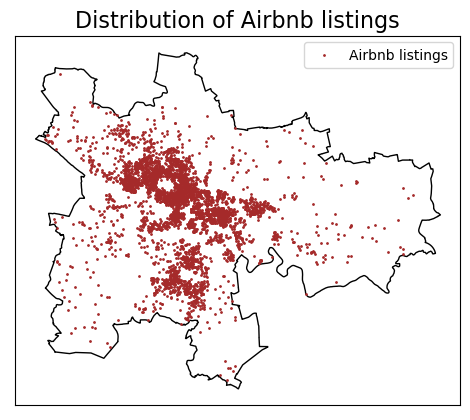

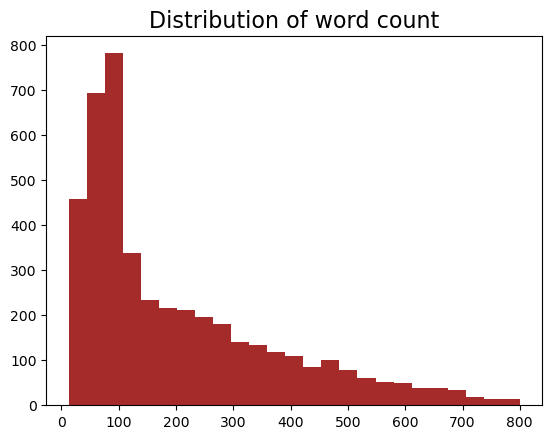

In [18]:
airbnb_g = gpd.GeoDataFrame(airbnb,geometry = gpd.points_from_xy(airbnb.lng,airbnb.lat),crs = 'EPSG:4326')
airbnb_g.head()
airbnb_g = airbnb_g.to_crs(27700)
print(airbnb_g.crs)

#plotting for check
ax = airbnb_g.plot(color = 'brown', zorder=2,markersize = 1)
boundary.plot(ax = ax, zorder = 1, color='w',edgecolor='k')
plt.xticks([])
plt.yticks([])
plt.grid(True, alpha=0.5)
plt.title('Distribution of Airbnb listings', fontsize=16)
plt.legend(['Airbnb listings'])
plt.show()

#distribution of description words

fig, ax = plt.subplots()
ax.hist(airbnb_g['word_count'],color = 'brown',bins=25)
plt.title('Distribution of word count', fontsize=16)
plt.show()

# LDA

In [19]:
import numpy as np
import sys
import re
from pprint import pprint
import nltk

#Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
#from gensim.utils import lemmatize
from gensim.models import CoherenceModel
from spacy.lang.en import English

#NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'also', 'may', 'take', 'come'])
stop_words = list(set(stop_words))
# print(stop_words)

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [20]:
#Tokenize sentences and clean
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub("\"", "", sent)  # remove double quotes
        sent = re.sub("min ","minute ", sent) # extend 'min' to 'minute'
        sent = re.sub("min. ","minute. ", sent) # extend 'min' to 'minute'
        sent = re.sub("min\)","minute ", sent) # extend 'min' to 'minute'
        sent = re.sub("mins ","minutes ", sent) # extend 'min' to 'minute'
        sent = re.sub("mins. ","minutes. ", sent) # extend 'min' to 'minute'
        sent = re.sub("mins\)","minutes ", sent) # extend 'min' to 'minute'
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  
        
# Concert to list
data = airbnb_g['description'].values.tolist()
print("Original data length is %s.\n"%(len(data)))
data_words = list(sent_to_words(data))


#Bulid the Bigram, Trigram models and lemmatize

#bulid the bigfram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


Original data length is 4398.



In [21]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm')
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
# print(data_ready[:3])
print("Processed data length is %s.\n"%(len(data_ready)))

Processed data length is 4398.



In [22]:
#Word Frequency
all_words = sum(data_ready,[])

wordcount = {}
for word in all_words:
    wordcount[word] = wordcount.get(word, 0)+1
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[:]

[('minute', 11967),
 ('walk', 9721),
 ('glasgow', 8577),
 ('apartment', 6032),
 ('flat', 6022),
 ('bedroom', 5646),
 ('station', 4531),
 ('city', 4253),
 ('area', 3824),
 ('bed', 3690),
 ('room', 3589),
 ('centre', 3552),
 ('restaurant', 3406),
 ('kitchen', 3403),
 ('train', 3327),
 ('guest', 3263),
 ('bus', 3230),
 ('parking', 3091),
 ('access', 2883),
 ('property', 2859),
 ('locate', 2792),
 ('available', 2746),
 ('park', 2733),
 ('bar', 2718),
 ('space', 2689),
 ('stay', 2672),
 ('away', 2615),
 ('double', 2512),
 ('large', 2459),
 ('bathroom', 2269),
 ('free', 2218),
 ('street', 2205),
 ('close', 2195),
 ('shop', 2013),
 ('great', 2010),
 ('living', 1975),
 ('end', 1936),
 ('road', 1928),
 ('include', 1927),
 ('distance', 1876),
 ('check', 1860),
 ('spacious', 1834),
 ('well', 1828),
 ('floor', 1814),
 ('transport', 1760),
 ('central', 1709),
 ('cop', 1687),
 ('link', 1611),
 ('local', 1584),
 ('location', 1581),
 ('place', 1558),
 ('private', 1541),
 ('provide', 1521),
 ('modern',

In [23]:
# Step 5. Build the topic model

#Create Dictionary
id2word = corpora.Dictionary(data_ready)

#Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [24]:
#for reference
airbnb_d = pd.DataFrame({'id':airbnb_g['id'].values.tolist(), 'original_d':data,'token':data_ready,'corpus':corpus})
airbnb_d.head(3)

,id,original_d,token,corpus
0,51514,The apartment is located in a historic period ...,"[apartment, locate, historic, period, building...","[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 9..."
1,256322,Fantastic ground level converted town house fl...,"[fantastic, ground, level, convert, town, bedr...","[(9, 1), (10, 2), (12, 1), (20, 1), (21, 1), (..."
2,388956,An additional single bed can be supplied in be...,"[additional, single, bed, supply, bedroom, adv...","[(2, 1), (5, 2), (11, 1), (12, 1), (20, 1), (4..."


In [25]:
#calculate the reference for the value of K and plot
def format_topics_sentences(corpus, dictionary, num, texts, id_d):
    
    model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = dictionary,
                                           num_topics = num,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 10,
                                           passes =10,
                                           alpha = 'symmetric',
                                           iterations = 100,
                                           per_word_topics = True)
    
    perplexity = model.log_perplexity(corpus)
    # Init output
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row_list in enumerate(model[corpus]):
        row = row_list[0] if model.per_word_topics else row_list      
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = model.show_topic(topic_num,topn=30)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    
    # Add id to the end of the output
    id_n = pd.Series(id_d)
    sent_topics_df = pd.concat([sent_topics_df, id_n], axis=1)
    
    sent_topics_df.reset_index()
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text','id']
    sent_topics_df.sort_values(by=['Dominant_Topic', 'Topic_Perc_Contrib'], inplace=True, ascending=False)
    
    # merge to a new list
    topic_num = n
    topic1 = []
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==0])==0:
        topic1.append(0)
        topic1.append(0)
        topic1.append(0)
        topic1.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==0].reset_index(drop=True)
        topic1.append(df.loc[0,'Dominant_Topic'])
        topic1.append(df.loc[0,'Topic_Perc_Contrib'])
        topic1.append(df.loc[0,'Keywords'])
        topic1.append(df.loc[0,'Text'])
    
    topic2 = []
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==1])==0:
        topic2.append(0)
        topic2.append(0)
        topic2.append(0)
        topic2.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==1].reset_index(drop=True)
        topic2.append(df.loc[0,'Dominant_Topic'])
        topic2.append(df.loc[0,'Topic_Perc_Contrib'])
        topic2.append(df.loc[0,'Keywords'])
        topic2.append(df.loc[0,'Text'])

    topic3 = []
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==2])==0:
        topic3.append(0)
        topic3.append(0)
        topic3.append(0)
        topic3.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==2].reset_index(drop=True)
        topic3.append(df.loc[0,'Dominant_Topic'])
        topic3.append(df.loc[0,'Topic_Perc_Contrib'])
        topic3.append(df.loc[0,'Keywords'])
        topic3.append(df.loc[0,'Text'])

    topic4 = []        
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==3])==0:
        topic4.append(0)
        topic4.append(0)
        topic4.append(0)
        topic4.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==3].reset_index(drop=True)
        topic4.append(df.loc[0,'Dominant_Topic'])
        topic4.append(df.loc[0,'Topic_Perc_Contrib'])
        topic4.append(df.loc[0,'Keywords'])
        topic4.append(df.loc[0,'Text'])

    topic5 = [] 
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==4])==0:
        topic5.append(0)
        topic5.append(0)
        topic5.append(0)
        topic5.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==4].reset_index(drop=True)
        topic5.append(df.loc[0,'Dominant_Topic'])
        topic5.append(df.loc[0,'Topic_Perc_Contrib'])
        topic5.append(df.loc[0,'Keywords'])
        topic5.append(df.loc[0,'Text'])

    topic6 = []         
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==5])==0:
        topic6.append(0)
        topic6.append(0)
        topic6.append(0)
        topic6.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==5].reset_index(drop=True)
        topic6.append(df.loc[0,'Dominant_Topic'])
        topic6.append(df.loc[0,'Topic_Perc_Contrib'])
        topic6.append(df.loc[0,'Keywords'])
        topic6.append(df.loc[0,'Text'])

    topic7 = []          
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==6])==0:
        topic7.append(0)
        topic7.append(0)
        topic7.append(0)
        topic7.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==6].reset_index(drop=True)
        topic7.append(df.loc[0,'Dominant_Topic'])
        topic7.append(df.loc[0,'Topic_Perc_Contrib'])
        topic7.append(df.loc[0,'Keywords'])
        topic7.append(df.loc[0,'Text'])

    topic8 = []          
    if len(sent_topics_df[sent_topics_df['Dominant_Topic']==7])==0:
        topic8.append(0)
        topic8.append(0)
        topic8.append(0)
        topic8.append(0)
    else:
        df = sent_topics_df[sent_topics_df['Dominant_Topic']==7].reset_index(drop=True)
        topic8.append(df.loc[0,'Dominant_Topic'])
        topic8.append(df.loc[0,'Topic_Perc_Contrib'])
        topic8.append(df.loc[0,'Keywords'])
        topic8.append(df.loc[0,'Text'])
    
    alist = [topic_num, perplexity, topic1, topic2, topic3, topic4, topic5, topic6, topic7, topic8]
    return(alist, sent_topics_df)

Alists = []
for n in range(4,9):
    
    Alist, sent= format_topics_sentences(corpus=corpus, dictionary=id2word, num=n, texts=data, id_d=(airbnb_d['id'].values.tolist())) #Used to check the matching of different models

    a = Alist[2:(n+6)]
    a.sort(key=lambda x:x[1],reverse=True)
    Alists.append((Alist[:2]+a+Alist[6+n:]))
    print(sent.groupby('Dominant_Topic').count())
        
# print(Alists[0])

C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


                Topic_Perc_Contrib  Keywords  Text    id
Dominant_Topic                                          
0                               65        65    65    65
1                              537       537   537   537
2                                7         7     7     7
3                             3789      3789  3789  3789


C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


                Topic_Perc_Contrib  Keywords  Text    id
Dominant_Topic                                          
0                                6         6     6     6
1                               37        37    37    37
2                                4         4     4     4
3                             3945      3945  3945  3945
4                              406       406   406   406


C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


                Topic_Perc_Contrib  Keywords  Text    id
Dominant_Topic                                          
0                                3         3     3     3
1                              504       504   504   504
2                                3         3     3     3
3                             3380      3380  3380  3380
4                              478       478   478   478
5                               30        30    30    30


C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


                Topic_Perc_Contrib  Keywords  Text    id
Dominant_Topic                                          
0                                2         2     2     2
1                              449       449   449   449
2                                3         3     3     3
3                             2799      2799  2799  2799
4                             1138      1138  1138  1138
5                                6         6     6     6
6                                1         1     1     1


C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


                Topic_Perc_Contrib  Keywords  Text    id
Dominant_Topic                                          
1                              466       466   466   466
3                             3888      3888  3888  3888
5                               42        42    42    42
7                                2         2     2     2


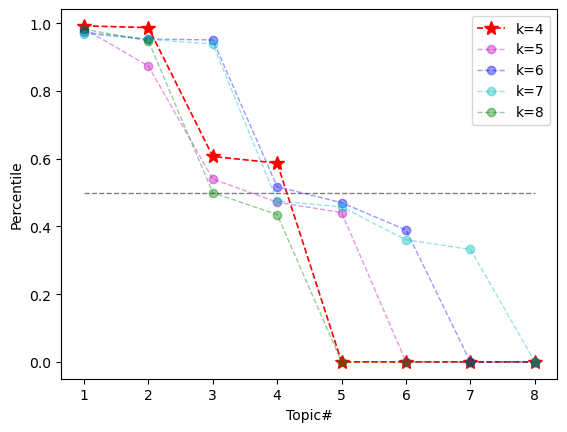

In [26]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8]
c_s = ['r*--','mo--','bo--','co--','go--']

plt.plot(x,[0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5],'k--',alpha=0.5, linewidth=1)
for i in range(5):
    if i>0:
        alpha = 0.4
        l_w  = 1
        m_s = 6
    else:
        alpha = 1
        l_w  = 1.2
        m_s = 10
    label_s = 'k='+str(4+i)
    y = []
    for j in range(8):
        y.append(Alists[i][2+j][1])
    plt.plot(x, y, c_s[i], markersize = m_s, linewidth=l_w,alpha = alpha, label=label_s)

# plt.title('I NEED A TITLE') 
plt.legend()
plt.xlabel('Topic#')
plt.ylabel('Percentile')
plt.savefig('kvalue.png',dpi=450)


In [27]:
#Perplexity
for i in range(5):
    print(Alists[i][0],Alists[i][1])
    print("\n")

4 -6.763664809181572


5 -6.842842727136884


6 -6.879756120773539


7 -6.937776575683122


8 -7.019454901257954




In [28]:
# Build LDA model + pyLDAVis (4 topics)
print("Topic number is 4.")
lda_model1 = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 4,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize = 10,
                                           passes =10,
                                           alpha = 'symmetric',
                                           iterations = 100,
                                           per_word_topics = True)
print(lda_model1[corpus])
perplexity1 = lda_model1.log_perplexity(corpus)
print(lda_model1.print_topics(15)) #lda.print_topics(30) print the top 30 topics
    
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model1, corpus, dictionary=lda_model1.id2word)
vis

Topic number is 4.
[(0, '0.075*"check" + 0.062*"student" + 0.043*"university" + 0.028*"request" + 0.018*"strictly" + 0.017*"date" + 0.017*"order" + 0.016*"picture" + 0.016*"mean" + 0.016*"buzz"'), (1, '0.048*"bedroom" + 0.040*"bed" + 0.039*"room" + 0.037*"kitchen" + 0.034*"double" + 0.027*"bathroom" + 0.023*"large" + 0.021*"living" + 0.017*"property" + 0.017*"apartment"'), (2, '0.021*"house" + 0.013*"back" + 0.013*"unique" + 0.012*"keep" + 0.012*"open" + 0.010*"western" + 0.010*"email" + 0.010*"book" + 0.010*"leave" + 0.010*"first"'), (3, '0.046*"minute" + 0.041*"walk" + 0.039*"glasgow" + 0.024*"flat" + 0.018*"city" + 0.018*"locate" + 0.016*"station" + 0.015*"centre" + 0.015*"cop" + 0.014*"train"')]


C:\Users\Angle Lu\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.271712 -0.004941       1        1  61.200126
1      0.203249  0.014982       2        1  25.090404
2     -0.230128 -0.282958       3        1   9.325505
0     -0.244832  0.272917       4        1   4.383965, topic_info=           Term          Freq         Total Category  logprob  loglift
12      bedroom   6763.000000   6763.000000  Default  30.0000  30.0000
74       minute  11269.000000  11269.000000  Default  29.0000  29.0000
289        room   3860.000000   3860.000000  Default  28.0000  28.0000
11          bed   4822.000000   4822.000000  Default  27.0000  27.0000
214       check   1778.000000   1778.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
418      ensure    268.164273    412.055756   Topic4  -4.1744   2.6977
1651  different    232.444977    341.912847   Topic4  -4.3173   2.7413
813    complete    262.734872    586.315138   Topic4  -4.1948   2.3245
199       share    253.264113    520.103134   Topic4  -4.2316   2.4076
753        host    259.609321    632.477579   Topic4  -4.2068   2.2367

[210 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
212       1  0.779586      access
212       2  0.219975      access
212       3  0.000358      access
2         2  0.995690  additional
2         3  0.003469  additional
...     ...       ...         ...
453       3  0.000928        wifi
591       2  0.004231   wonderful
591       3  0.994217   wonderful
549       2  0.006074        yard
549       3  0.990031        yard

[492 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\4200172084.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==o[i], 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\4200172084.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==o[i], 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\4200172084.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==o[i], 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\4200172084.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==o[i], 'word'], rotation=30, horizontalalignment= 'right')


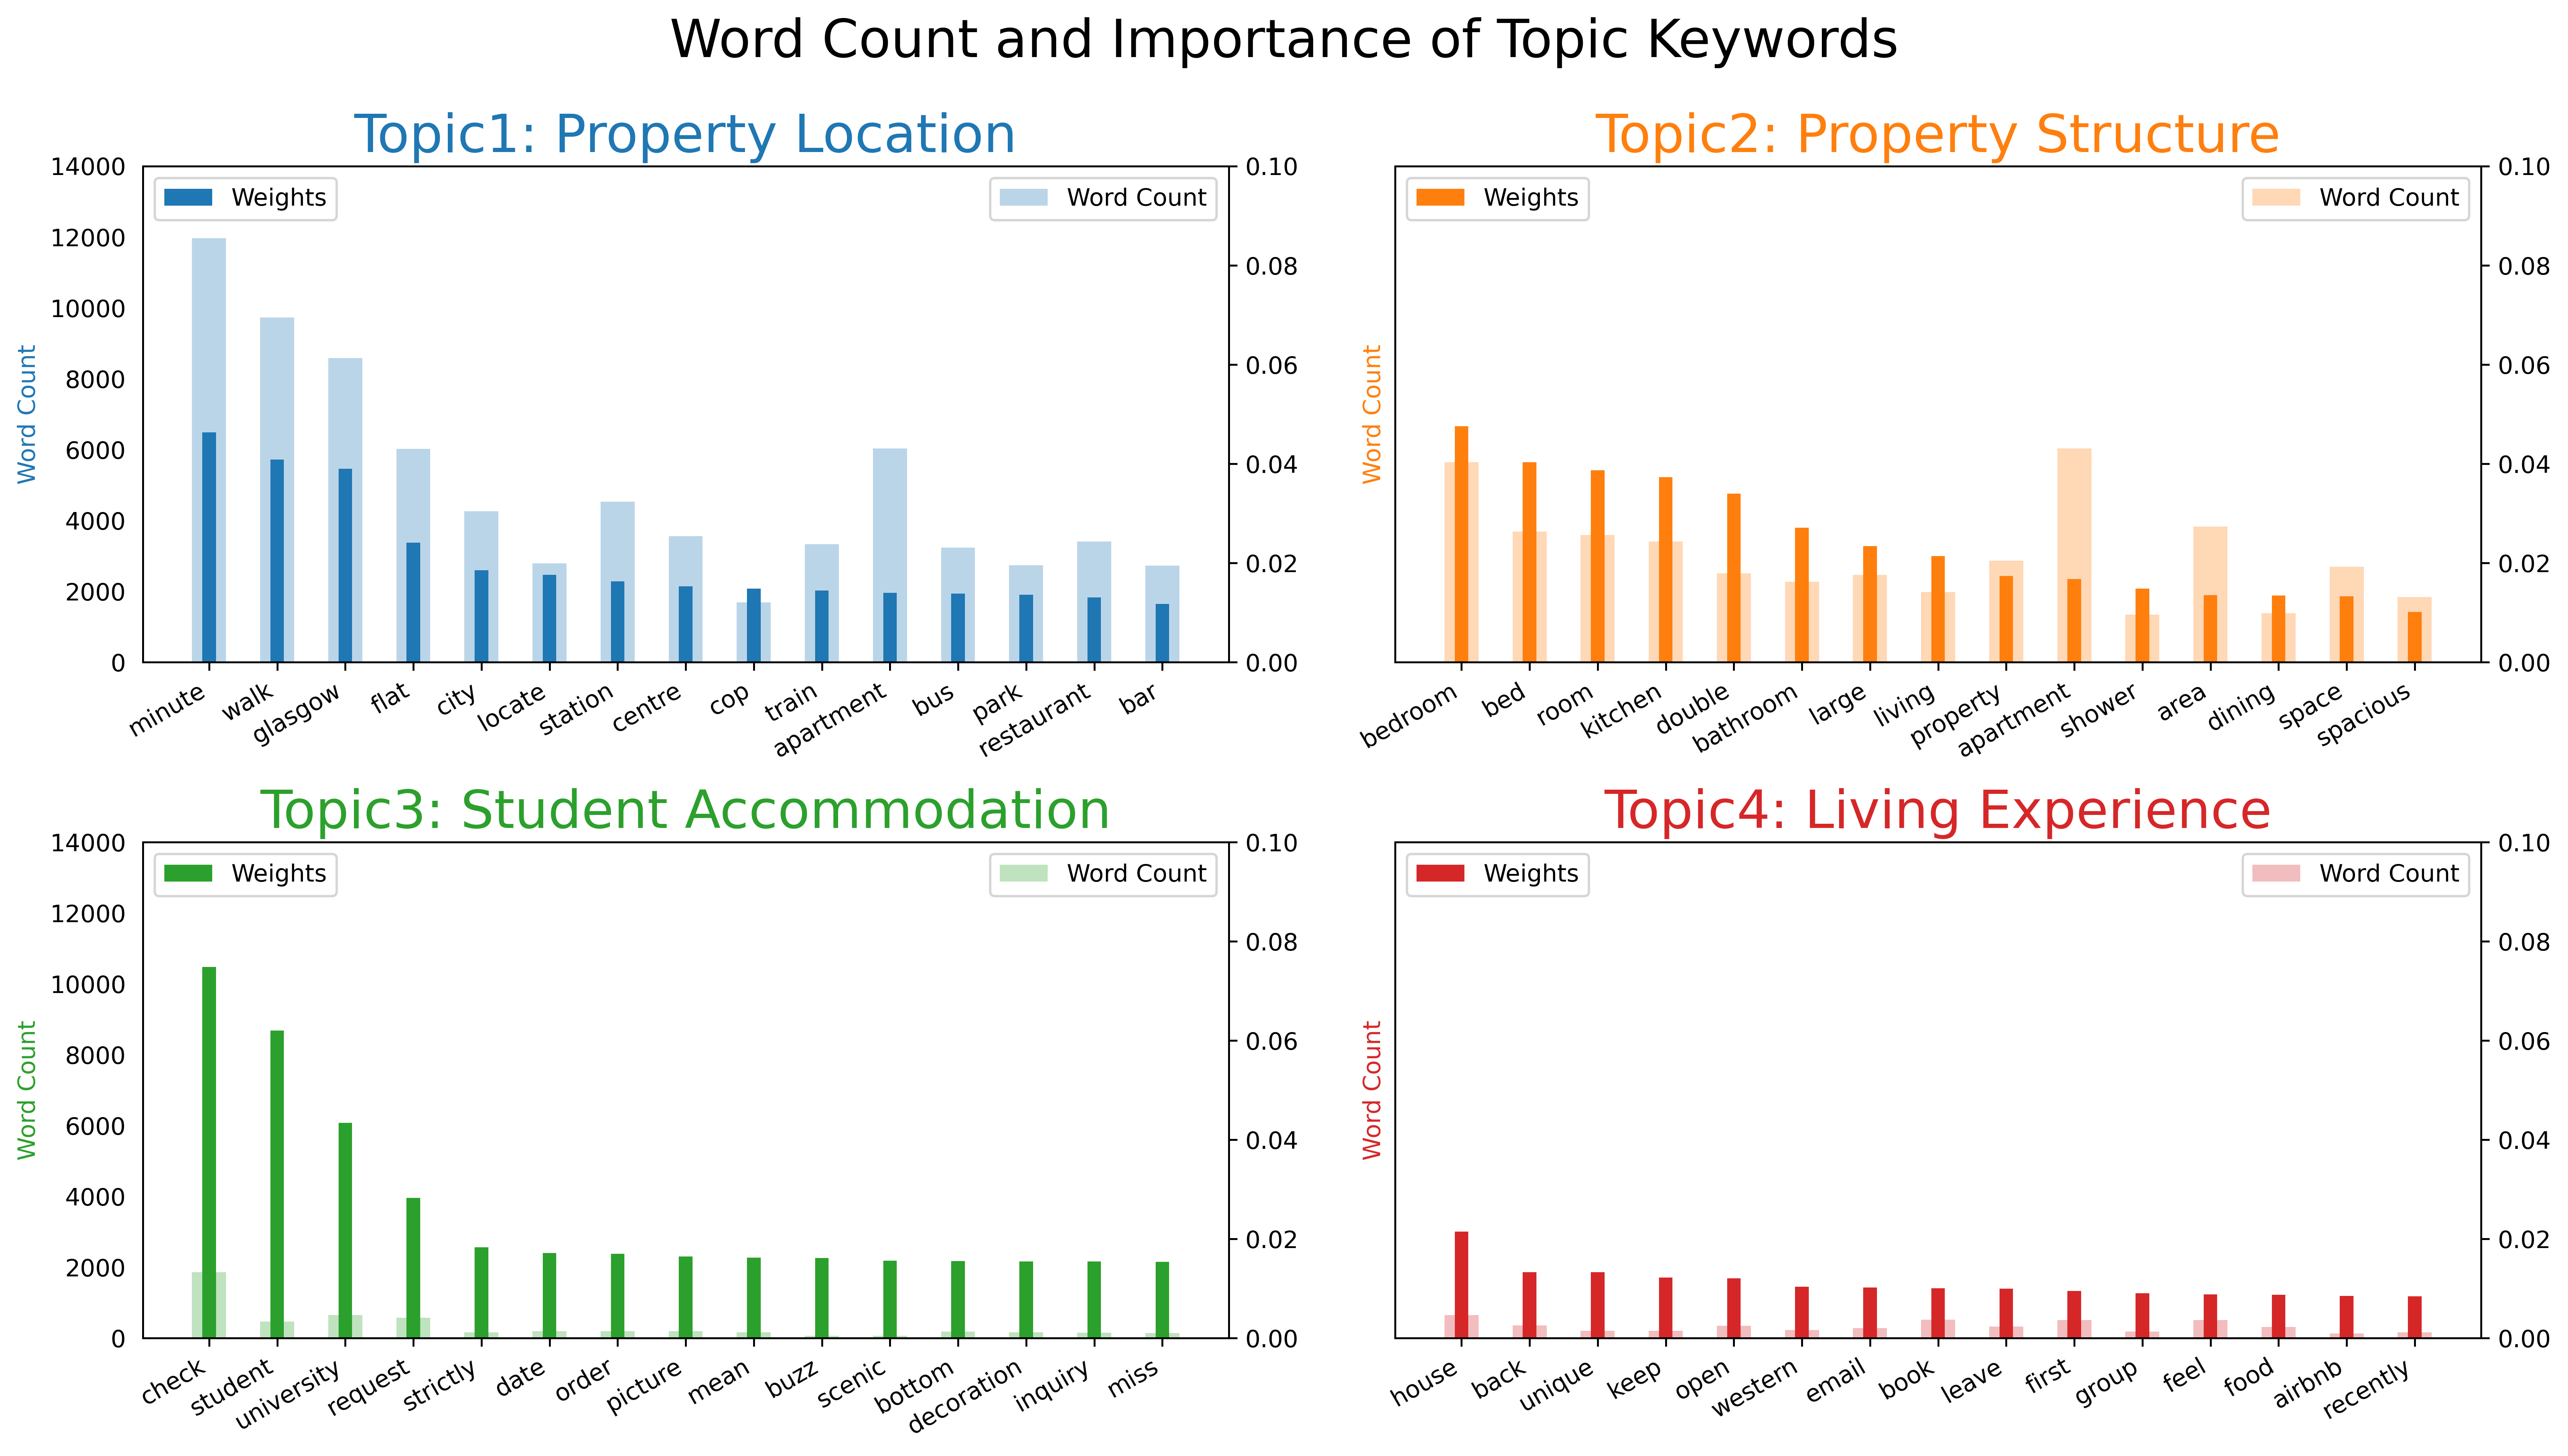

In [29]:
# Visualization
from collections import Counter
import matplotlib.colors as mcolors
topics = lda_model1.show_topics(formatted=False,num_words=15)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(15,8), sharey=True, dpi=450)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
subtitle = ['Student Accommodation','Property Structure','Living Experience','Property Location']
# Adjust the topic order
o = [3,1,0,2]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==o[i], :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==o[i], :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 14000)
    ax.set_title('Topic' +str(i+1)+': '+ subtitle[(o[i])], color=cols[i], fontsize=22)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==o[i], 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper right'); ax_twin.legend(loc='upper left')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05) 
plt.savefig('Word Count and Importance of Topic Keywords_Airbnb.png',dpi=450)

In [30]:
#t-SNE Clustering Chart
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model1[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\Angle Lu\anaconda3\lib\site-packages\bokeh\core\property\primitive.py:37: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  bokeh_bool_types += (np.bool8,)
C:\Users\Angle Lu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4374 samples in 0.002s...
[t-SNE] Computed neighbors for 4374 samples in 0.088s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4374
[t-SNE] Computed conditional probabilities for sample 2000 / 4374
[t-SNE] Computed conditional probabilities for sample 3000 / 4374
[t-SNE] Computed conditional probabilities for sample 4000 / 4374
[t-SNE] Computed conditional probabilities for sample 4374 / 4374
[t-SNE] Mean sigma: 0.009269


C:\Users\Angle Lu\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.932056
[t-SNE] KL divergence after 1000 iterations: 0.631921


Loading BokehJS ...

In [33]:
#identify the theme of each description
Alist, sent= format_topics_sentences(corpus=corpus, dictionary=id2word, num=4, texts=data, id_d=(airbnb_d['id'].values.tolist())) #Used to check the matching of different models

# merge to a new dataset
airbnb_result = pd.merge(airbnb_g, sent, how='left', on='id')

# change the values in the 'Dominant_Topic' variable:
airbnb_result['Dominant_Topic'] = airbnb_result['Dominant_Topic'].replace([0],'Student Accommodation')
airbnb_result['Dominant_Topic'] = airbnb_result['Dominant_Topic'].replace([1],'Property Structure')
airbnb_result['Dominant_Topic'] = airbnb_result['Dominant_Topic'].replace([2],'Living Experience')
airbnb_result['Dominant_Topic'] = airbnb_result['Dominant_Topic'].replace([3],'Property Location')

# Export cleaned data + LDA
airbnb_result.to_csv("result_Airbnb.csv", index=False, index_label=False)

C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Angle Lu\AppData\Local\Temp\ipykernel_25708\1589789147.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
